Expectation Maximisation Based GMM for 1d data

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
np.random.seed(0)


x1 = np.random.normal(0, 1, 20)

x2 = np.random.normal(4, 1, 10)


x = np.hstack((x1, x2))
c_true = np.hstack((np.zeros(len(x1)), np.ones(len(x2))))

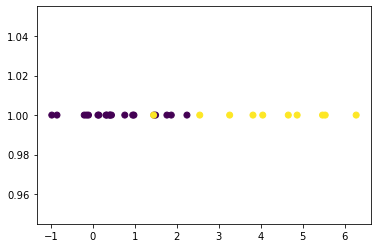

In [3]:
plt.scatter(x, np.ones_like(x), c=c_true)

In [4]:
n_points = len(x)
n_clusters = 2

responsibility = np.abs(np.random.randn(n_points, n_clusters))
responsibility = responsibility/responsibility.sum(axis=1).reshape(-1, 1)
responsibility

array([[0.29064816, 0.70935184],
       [0.3094859 , 0.6905141 ],
       [0.68994443, 0.31005557],
       [0.50573667, 0.49426333],
       [0.56164474, 0.43835526],
       [0.42476113, 0.57523887],
       [0.46657066, 0.53342934],
       [0.53776294, 0.46223706],
       [0.61705372, 0.38294628],
       [0.88353452, 0.11646548],
       [0.69829084, 0.30170916],
       [0.30199472, 0.69800528],
       [0.06173353, 0.93826647],
       [0.18026879, 0.81973121],
       [0.63619042, 0.36380958],
       [0.65160037, 0.34839963],
       [0.32020833, 0.67979167],
       [0.30632592, 0.69367408],
       [0.77888842, 0.22111158],
       [0.94584755, 0.05415245],
       [0.84968314, 0.15031686],
       [0.47990395, 0.52009605],
       [0.37008784, 0.62991216],
       [0.60069607, 0.39930393],
       [0.84725969, 0.15274031],
       [0.56397057, 0.43602943],
       [0.23260953, 0.76739047],
       [0.43977247, 0.56022753],
       [0.86757617, 0.13242383],
       [0.50383514, 0.49616486]])

# Step 1

Randomly assign points to cluster

## Get MLE estimate

In [5]:
means = {}
variances = {}
pis = {}
num_points = {}

for cl in range(n_clusters):
    num_points[cl] = np.sum(responsibility[:, cl])
    means[cl] = np.sum(responsibility[:, cl]*x)/num_points[cl]
    variances[cl] =(responsibility[:, cl]*(x-means[cl]))@(x-means[cl])/num_points[cl]
    pis[cl] = num_points[cl]/len(x)*1.

In [6]:
means

{0: 1.811202547690311, 1: 1.7365808845178283}

In [7]:
variances

{0: 4.606243116499825, 1: 3.4207043429407005}

In [8]:
pis

{0: 0.5307962111099872, 1: 0.46920378889001285}

## Getting state distribution

In [9]:
from scipy.stats import norm


In [10]:

for i, point in enumerate(x):
    for cl in range(n_clusters):
        responsibility[i, cl] = norm.pdf(point, means[cl], np.sqrt(variances[cl]))*pis[cl]
    responsibility[i] = responsibility[i]/np.sum(responsibility[i])
        


In [11]:
responsibility

array([[0.49360708, 0.50639292],
       [0.50487343, 0.49512657],
       [0.49582077, 0.50417923],
       [0.49792287, 0.50207713],
       [0.49418044, 0.50581956],
       [0.55158183, 0.44841817],
       [0.49612085, 0.50387915],
       [0.51935518, 0.48064482],
       [0.51786449, 0.48213551],
       [0.50465429, 0.49534571],
       [0.5108898 , 0.4891102 ],
       [0.49309502, 0.50690498],
       [0.49848808, 0.50151192],
       [0.5114737 , 0.4885263 ],
       [0.50396978, 0.49603022],
       [0.50631684, 0.49368316],
       [0.49305976, 0.50694024],
       [0.52107231, 0.47892769],
       [0.50678108, 0.49321892],
       [0.54598902, 0.45401098],
       [0.49310467, 0.50689533],
       [0.58451256, 0.41548744],
       [0.59692852, 0.40307148],
       [0.52140182, 0.47859818],
       [0.69433778, 0.30566222],
       [0.5029213 , 0.4970787 ],
       [0.55279391, 0.44720609],
       [0.54233861, 0.45766139],
       [0.640516  , 0.359484  ],
       [0.6361317 , 0.3638683 ]])

In [12]:
norm.pdf(x[0], means[cl], np.sqrt(variances[cl]))*pis[cl], norm.pdf(x[1], means[cl], np.sqrt(variances[cl]))*pis[cl]

(0.10119659488606768, 0.0779536130090353)

In [13]:
import os

Total

In [14]:
x_pl = np.linspace(-5, 15, 1000)
for iteration in range(50):

    means = {}
    variances = {}
    pis = {}
    num_points = {}

    for cl in range(n_clusters):
        num_points[cl] = np.sum(responsibility[:, cl])
        means[cl] = np.sum(responsibility[:, cl]*x)/num_points[cl]
        variances[cl] =(responsibility[:, cl]*(x-means[cl]))@(x-means[cl])/num_points[cl]
        pis[cl] = num_points[cl]/len(x)*1.
    print(means)
    norm_obj = {}
    for cl in range(n_clusters):
        norm_obj[cl] = norm(loc=means[cl], scale=np.sqrt(variances[cl]))
        plt.plot(x_pl, norm_obj[cl].pdf(x_pl),
                lw=3, alpha=0.6, label='Cluster {}'.format(cl))
    plt.legend()
    plt.scatter(x, np.zeros_like(x), c='k', s=300, marker='|')
    plt.title("Iteration: {}".format(str(iteration).zfill(2)))
    plt.savefig(os.path.expanduser("~/git/explain-ml/figs/gmm/{}.jpg".format(str(iteration).zfill(2))))
    
    plt.clf()
    for i, point in enumerate(x):
        for cl in range(n_clusters):
            responsibility[i, cl] = norm.pdf(point, means[cl], np.sqrt(variances[cl]))*pis[cl]
        responsibility[i] = responsibility[i]/np.sum(responsibility[i])

    


{0: 1.9173980573008533, 1: 1.6162692922638195}
{0: 2.002619693260101, 1: 1.519955033469756}
{0: 2.102587247291366, 1: 1.4076599938452945}
{0: 2.234860495754749, 1: 1.2612433708062132}
{0: 2.409822408413753, 1: 1.075023378426826}
{0: 2.6273490967019537, 1: 0.8670287163501723}
{0: 2.8679135871140335, 1: 0.6884976557737934}
{0: 3.090351602442461, 1: 0.575666616049015}
{0: 3.2589719217000677, 1: 0.5124417667388845}
{0: 3.3795334341758263, 1: 0.4787295498248887}
{0: 3.470402743321426, 1: 0.46358566682442165}
{0: 3.544402980954772, 1: 0.45969382622036614}
{0: 3.6089460263278226, 1: 0.4621878714134998}
{0: 3.6681803888102995, 1: 0.4681319303944199}
{0: 3.724392231940696, 1: 0.4758843379666043}
{0: 3.7788207349742944, 1: 0.4845790199544586}
{0: 3.832126737248982, 1: 0.49378580238635583}
{0: 3.8846530601965763, 1: 0.5033071913277888}
{0: 3.936562154798014, 1: 0.5130620927376859}
{0: 3.9879051181374807, 1: 0.5230212290869529}
{0: 4.03865462028011, 1: 0.5331720912958502}
{0: 4.088720313810327, 1:

<Figure size 432x288 with 0 Axes>

In [21]:
!convert -delay 20 -loop 0 ../figs/gmm/*.jpg ../figs/gmm/gmm.gif

![](/Users/nipun/git/explain-ml/figs/gmm.gif)

In [22]:
    !pip install -q mediapy


In [23]:
import mediapy as media

In [29]:
media.show_video(media.read_video("../figs/gmm.gif"), fps=2)

In [539]:
from scipy.stats import multivariate_normal
class GMM:
    def __init__(self, n_clusters=2, random_seed=0):
        self.n_clusters = n_clusters
        np.random.seed(random_seed)
    
    def fit(self, X, n_iter=100):
        self.n_samples, self.dim = X.shape
        self.n_iter = n_iter
        self.X = X
        self.responsibility = np.abs(np.random.random(size=(self.n_samples, self.n_clusters)))
        self.responsibility = self.responsibility/self.responsibility.sum(axis=1).reshape(-1, 1)
        self.means = {}
        self.covariances = {}
        self.pis = {}
        self.num_points = {}
        
        from sklearn.cluster import KMeans
        km = KMeans(n_clusters=self.n_clusters)
        km.fit(X)
        
        for cl in range(self.n_clusters):
            self.pis[cl] = np.random.random()
            #self.means[cl] = np.random.randn(self.dim)
            self.means[cl] = km.cluster_centers_[cl]
            temp = np.abs(np.random.randn(self.dim, self.dim))
            self.covariances[cl] = np.transpose(temp)@temp
            self.covariances[cl] = 0.5+np.random.uniform()*np.ones((self.dim, self.dim))
            self.covariances[cl] = self.covariances[cl] - 0.1*np.eye(self.dim, self.dim)
            self.covariances[cl] = self.covariances[cl].T@self.covariances[cl]
            print(self.covariances[cl])
            #print(self.covariances[cl].shape)
        print(self.means)
        # Normalizing pi
        for cl in range(self.n_clusters):
            #self.pis[cl] = self.pis[cl]/np.sum(list(self.pis.values()))
            self.pis[cl] = 1.0/self.n_clusters
        for i in range(self.n_iter):
            #self.m_step()
            self.e_step()
            self.m_step()
            print("****"*20, "Iteration:", i)
            print(self.means)
            
    
    def e_step(self):
        #print("----"*10+"E-Step")
        self.norm_obj = {}
        for cl in range(self.n_clusters):
            self.norm_obj[cl] = multivariate_normal(mean=self.means[cl], cov=self.covariances[cl])
        
        for i, point in enumerate(self.X):
            for cl in range(n_clusters):
                self.responsibility[i, cl] = self.norm_obj[cl].pdf(point)*self.pis[cl]
        
            self.responsibility[i] = self.responsibility[i]/np.sum(self.responsibility[i])

        #print(self.responsibility)
        
        
        
    
    def m_step(self):
        #print("----"*10+"M-Step")
        for cl in range(self.n_clusters):
            #print("--"*20)
            self.num_points[cl] = np.sum(self.responsibility[:, cl])
            self.means[cl] = np.sum(self.responsibility[:, cl].reshape(-1, 1)*self.X, axis=0)/self.num_points[cl]
            self.covariances[cl] = 0.1*np.eye(self.dim, self.dim)+((g.X-g.means[0]).T* g.responsibility[:, 0])@(self.X-self.means[cl])/self.num_points[cl]
            self.pis[cl] = self.num_points[cl]/len(self.X)*1.
        print(self.covariances)
    



In [540]:
X, y = make_blobs(cluster_std=0.3)
g = GMM(n_clusters=3)

In [541]:
from sklearn.datasets import make_blobs

In [542]:
g.fit(X, n_iter=50, )

[[1.52067793 1.51067793]
 [1.51067793 1.52067793]]
[[0.51580641 0.50580641]
 [0.50580641 0.51580641]]
[[1.0810998 1.0710998]
 [1.0710998 1.0810998]]
{0: array([-2.362242  , -6.45944004]), 1: array([4.00096528, 5.58686895]), 2: array([ 5.69944572, -8.95741097])}
{0: array([[0.14105041, 0.02976553],
       [0.02976553, 0.14053577]]), 1: array([[0.13433365, 0.02489522],
       [0.02489522, 0.13390321]]), 2: array([[0.10329214, 0.00238712],
       [0.00238712, 0.10325086]])}
******************************************************************************** Iteration: 0
{0: array([-2.36386576, -6.48548318]), 1: array([3.9701034 , 5.61035031]), 2: array([ 2.62911426, -3.90889871])}
{0: array([[0.14263929, 0.01026418],
       [0.01026418, 0.13796932]]), 1: array([[0.13542845, 0.00852838],
       [0.00852838, 0.13154824]]), 2: array([[0.10121681, 0.00029291],
       [0.00029291, 0.10108354]])}
******************************************************************************** Iteration: 1
{0: array

<ipython-input-539-c680930228cf>:68: RuntimeWarning: invalid value encountered in true_divide
  self.means[cl] = np.sum(self.responsibility[:, cl].reshape(-1, 1)*self.X, axis=0)/self.num_points[cl]


ValueError: array must not contain infs or NaNs

In [483]:
(g.X-g.means[0]).T.shape, g.responsibility[:, 0].shape

((2, 100), (100,))

In [534]:
g.covariances[0]
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)


is_pos_def(g.covariances[0])

False

[-4.33587111 -2.53063216]
[[ 0.03978699 -0.00179734]
 [-0.00179734  0.04448948]]
[3.59279246 3.88614795]
[[ 1.00000000e-02 -1.16376359e-19]
 [-1.16376359e-19  1.00000000e-02]]
[-2.32981121  2.42100756]
[[ 1.00000000e-02 -1.49028281e-23]
 [-1.49028281e-23  1.00000000e-02]]


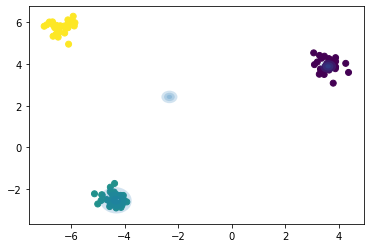

In [485]:
plt.scatter(X[:, 0], X[:, 1],c=y)
for pos, covar in zip(list(g.means.values()), list(g.covariances.values())):
    print(pos)
    print(covar)
    draw_ellipse(pos, covar, alpha=0.2)


In [486]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [487]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')

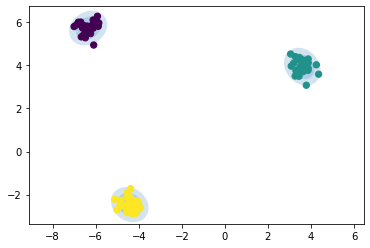

In [488]:
plot_gmm(model, X)

In [489]:
model.covariances_

array([[[ 0.08681113,  0.01511591],
        [ 0.01511591,  0.07223737]],

       [[ 0.0804684 , -0.01724409],
        [-0.01724409,  0.08504704]],

       [[ 0.08455924, -0.014684  ],
        [-0.014684  ,  0.07498469]]])

In [490]:
model.means_

array([[-6.35013985,  5.73726495],
       [ 3.5985731 ,  3.94672656],
       [-4.4152169 , -2.46663426]])

In [491]:
g.means

{0: array([-4.33587111, -2.53063216]),
 1: array([3.59279246, 3.88614795]),
 2: array([-2.32981121,  2.42100756])}

In [474]:
g.covariances

{0: array([[ 0.03978699, -0.00179735],
        [-0.00179735,  0.04448948]]),
 1: array([[ 1.0000000e-02, -5.4867788e-20],
        [-5.4867788e-20,  1.0000000e-02]]),
 2: array([[ 1.00000000e-02, -1.35288216e-23],
        [-1.35288216e-23,  1.00000000e-02]])}